In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

import cv2
import pickle
import numpy as np
import pandas as pd

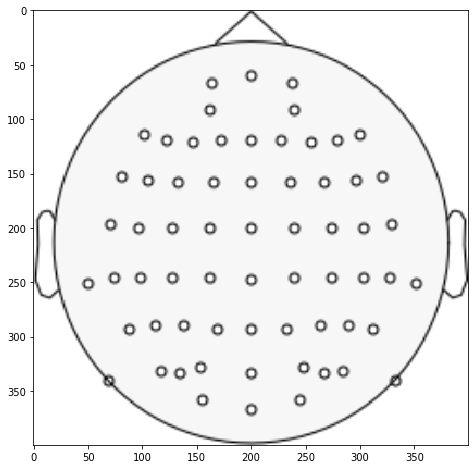

In [16]:
topo = cv2.imread("topo_skeleton.png", cv2.IMREAD_GRAYSCALE)
topo = cv2.resize(topo, (400,400))
topo = 255 - topo
plt.figure(figsize=(8,8))
plt.imshow(topo, cmap='binary')

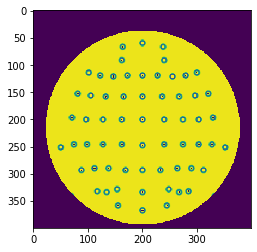

In [17]:
height,width = topo.shape
circle_img = np.zeros((height,width), np.uint8)
cv2.circle(circle_img,(201,215),178,255,thickness=-1)

masked_img = circle_img * topo

plt.figure()
plt.imshow(masked_img)

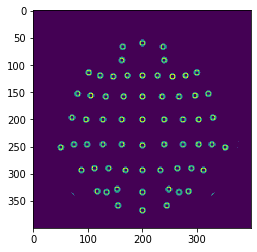

In [18]:
ch_pos_img = 255 - masked_img

ch_pos_img = np.where(ch_pos_img == 255, 0, ch_pos_img)
ch_pos_img = np.where(ch_pos_img < 20, 0, ch_pos_img)
plt.imshow(ch_pos_img)

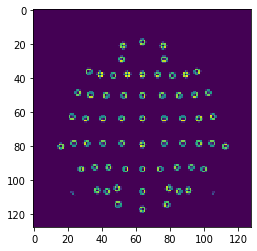

In [43]:
ch_pos_img_128x128 = cv2.resize(ch_pos_img,(128,128))
ch_pos = []
for i in range(ch_pos_img_128x128.shape[0]):
    for j in range(ch_pos_img_128x128.shape[1]):
         if ch_pos_img_128x128[i,j] > 0:
            ch_pos.append((i, j, ch_pos_img_128x128[i,j]))
            
plt.imshow(ch_pos_img_128x128)

In [44]:
ch_pos = np.array(ch_pos)
ch_pos = ch_pos[:,:2]


kmn = KMeans(n_clusters=64, verbose=1, random_state=10)

pred = kmn.fit(ch_pos)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3278.9523169082377
start iteration
done sorting
end inner loop
Iteration 1, inertia 3189.9068117597913
start iteration
done sorting
end inner loop
Iteration 2, inertia 3181.5898182957394
start iteration
done sorting
end inner loop
Iteration 3, inertia 3181.5898182957394
center shift 0.000000e+00 within tolerance 6.799877e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3099.8464253324933
start iteration
done sorting
end inner loop
Iteration 1, inertia 3074.959123745192
start iteration
done sorting
end inner loop
Iteration 2, inertia 3074.959123745192
center shift 0.000000e+00 within tolerance 6.799877e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3088.7477370429488
start iteration
done sorting
end inner loop
Iteration 1, inertia 3065.221476538747
start iteration
done sorting
end inner loop
Iteration 2, inerti

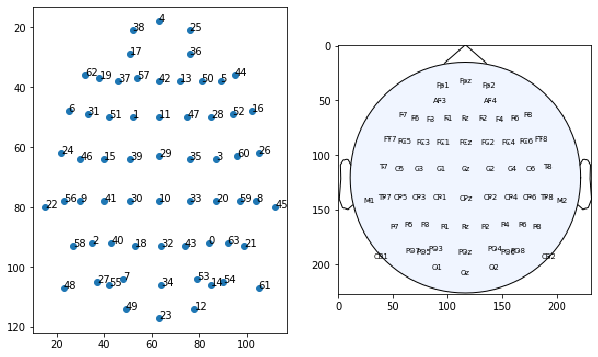

In [53]:
centers = pred.cluster_centers_.astype(np.int)
r_64_ch = cv2.imread("r_64_ch_topomap.png", cv2.IMREAD_COLOR)

plt.figure(figsize=(10,6))

plt.subplot(121)
plt.scatter(centers[:,1], centers[:,0])
plt.gca().invert_yaxis()

for i,c in enumerate(centers):
    
    plt.annotate(i, (c[1], c[0]))
    
plt.subplot(122)
plt.imshow(r_64_ch)